# Regresión Lineal
<a href="https://colab.research.google.com/github/andrescastro-itm/IA_ITM_2025-2/blob/main/Clase06/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

np.random.seed(seed=0)

## Creación de datos sintéticos

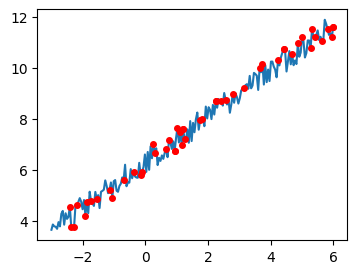

In [2]:
D = lambda x: 0.9*x+5.8 #función para generar puntos

t = np.linspace(-3,6,200) #rango de x

TT = D(t)+np.random.rand(200) #generar datos (sumarle aleatoriedad)


fig = plt.figure(figsize=(4,3))
plt.plot(t,TT)

#Escoger únicamente nd datos
per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
y = np.expand_dims(y,axis=1) #Vector columna

plt.plot(X,y,'or',markersize=4)
plt.show()

In [3]:
X.shape

(50,)

## Solución mediante Método analítico

In [4]:
#Matriz extendida

o = np.ones(nd)
X = X.reshape(nd)
X1 = np.stack((o,X),axis = 1)
X1

array([[ 1.        ,  5.95477387],
       [ 1.        ,  6.        ],
       [ 1.        , -2.18592965],
       [ 1.        ,  1.16080402],
       [ 1.        , -1.05527638],
       [ 1.        ,  0.75376884],
       [ 1.        ,  5.00502513],
       [ 1.        , -1.14572864],
       [ 1.        ,  1.20603015],
       [ 1.        ,  4.86934673],
       [ 1.        ,  3.73869347],
       [ 1.        ,  1.02512563],
       [ 1.        ,  0.30150754],
       [ 1.        , -1.73366834],
       [ 1.        ,  1.74874372],
       [ 1.        ,  5.4120603 ],
       [ 1.        ,  2.78894472],
       [ 1.        , -0.15075377],
       [ 1.        , -2.27638191],
       [ 1.        ,  1.79396985],
       [ 1.        ,  4.41708543],
       [ 1.        ,  1.25125628],
       [ 1.        , -1.91457286],
       [ 1.        ,  2.24623116],
       [ 1.        ,  5.63819095],
       [ 1.        ,  5.81909548],
       [ 1.        , -0.69346734],
       [ 1.        ,  3.15075377],
       [ 1.        ,

In [5]:
inv = np.linalg.inv(np.matmul(X1.T,X1))
w = np.matmul(np.matmul(inv,X1.T,),y)

print(w)

[[6.29722881]
 [0.92668995]]


In [6]:
#Otra forma (sobrecarga de operadores)

np.linalg.inv(X1.T@X1)@X1.T@y #Solo en python 3.5+ (en adelante)

array([[6.29722881],
       [0.92668995]])

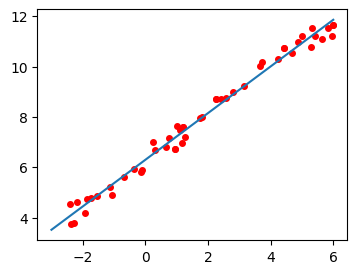

In [7]:
#Graficar recta estimada

G = np.stack((np.ones(200),t),axis = 1)

#w.shape
#G.shape
fig = plt.figure(figsize=(4, 3))
plt.plot(X,y,'or',markersize=4)
plt.plot(t,np.matmul(G,w))
plt.show()

## Regresión Lineal con Gradiente Descendente

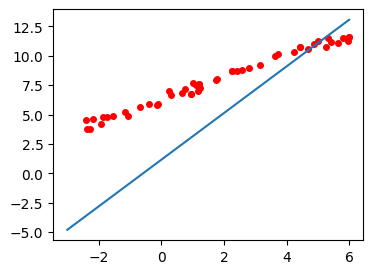

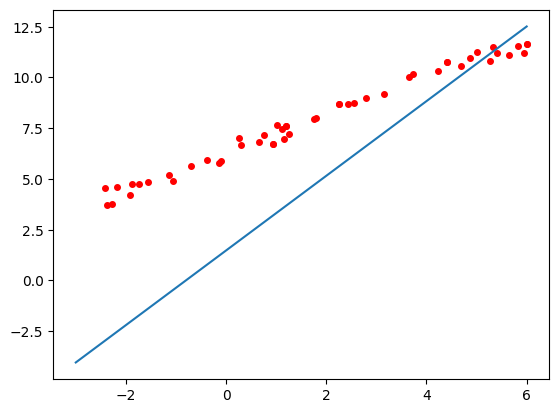

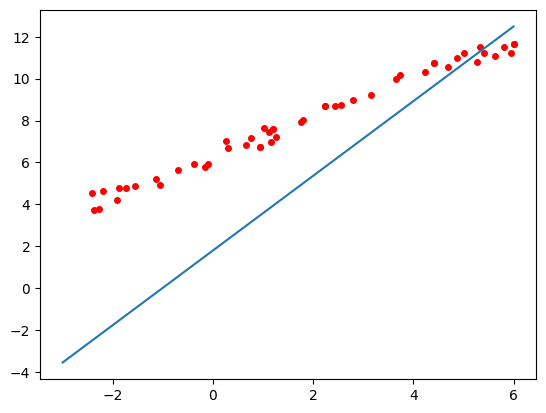

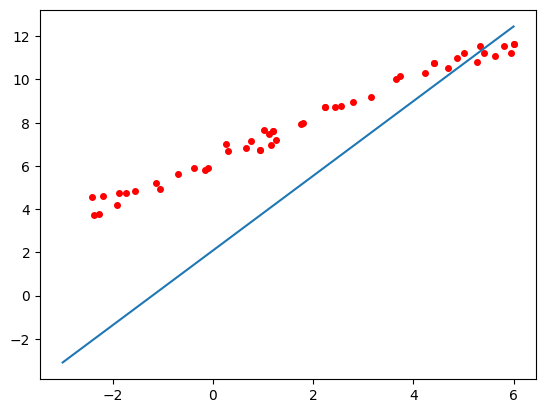

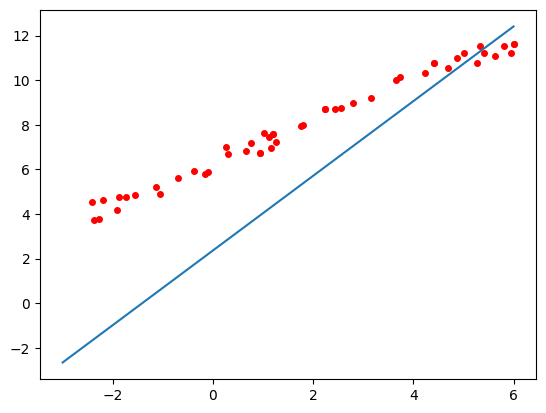

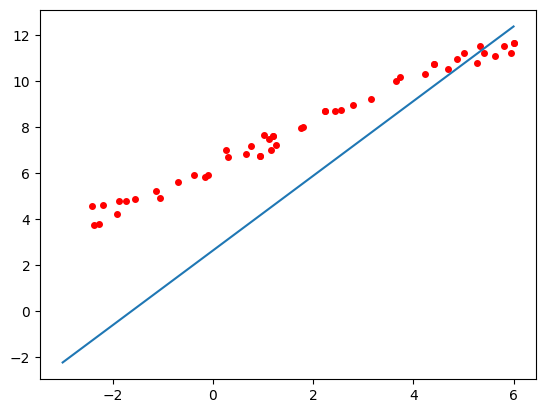

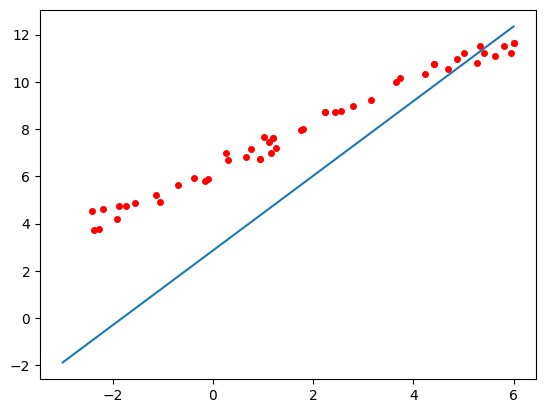

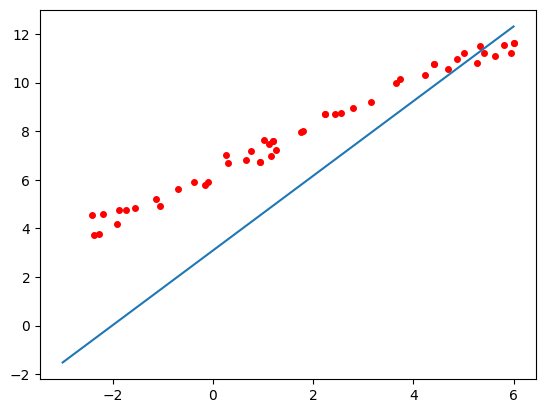

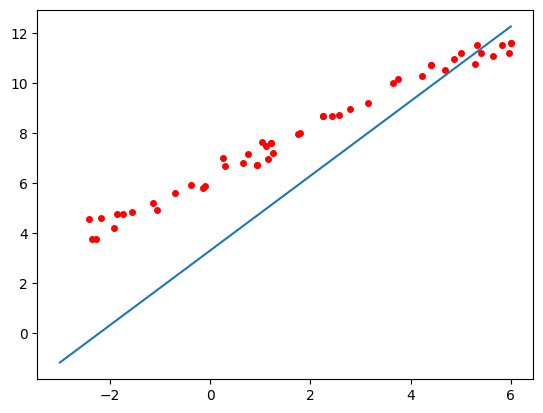

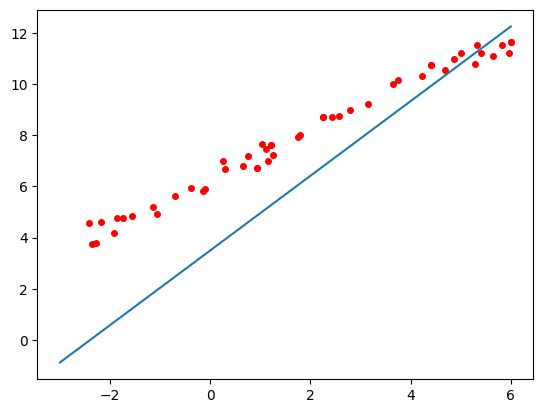

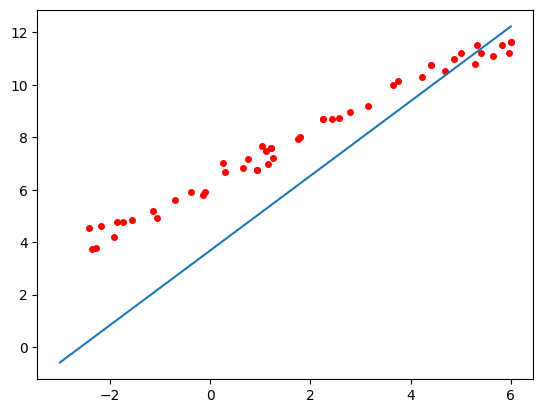

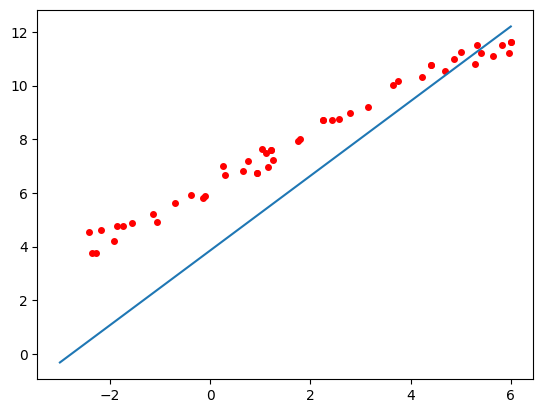

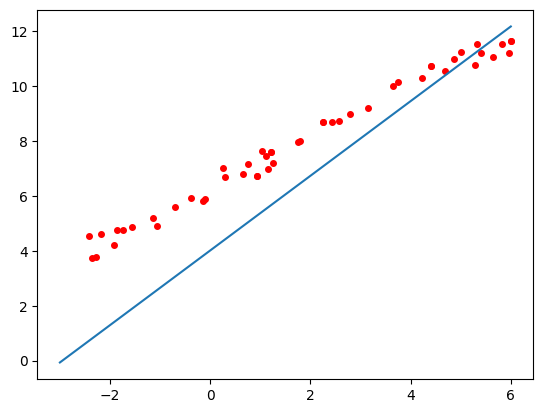

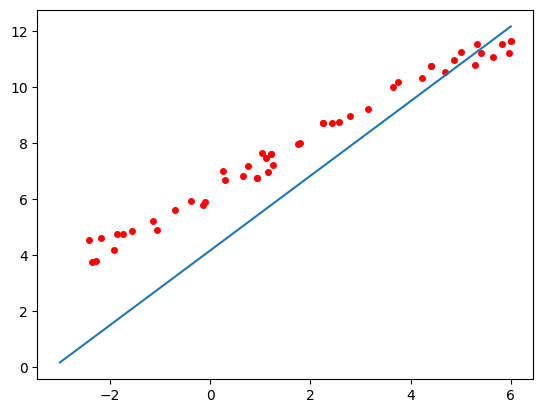

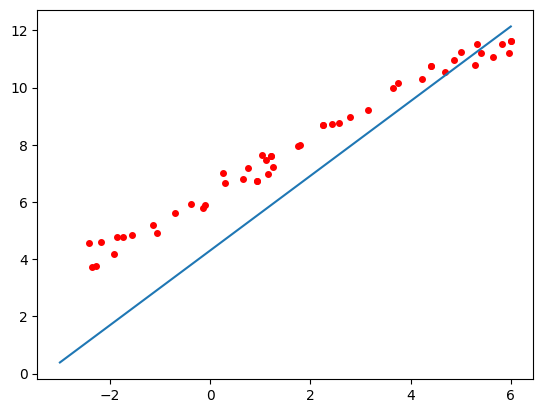

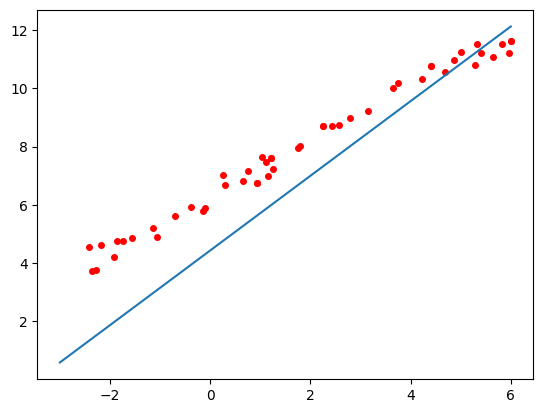

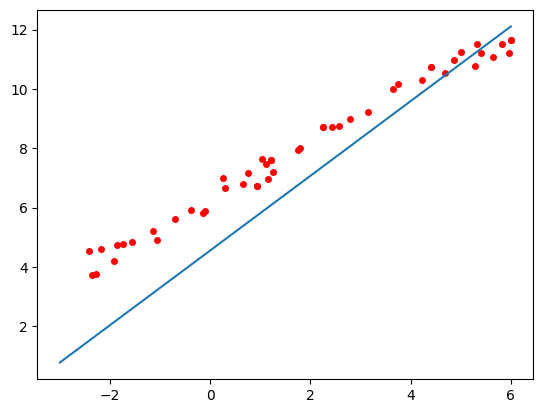

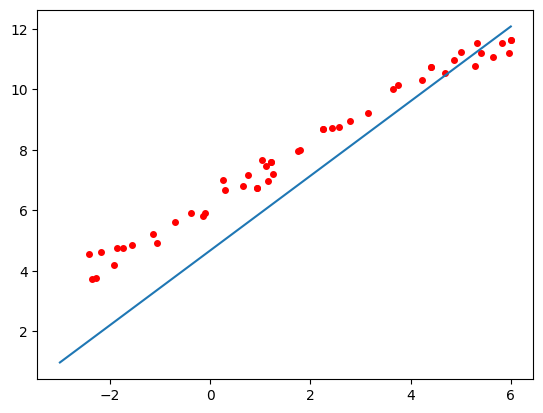

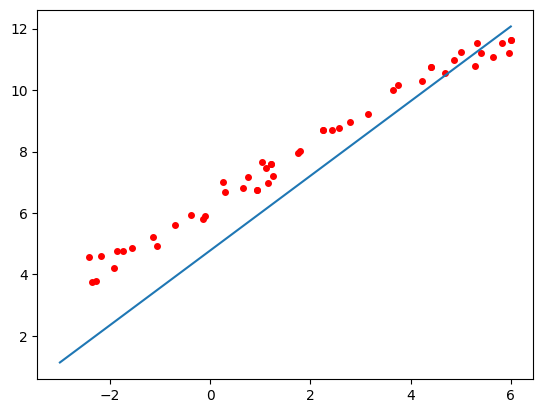

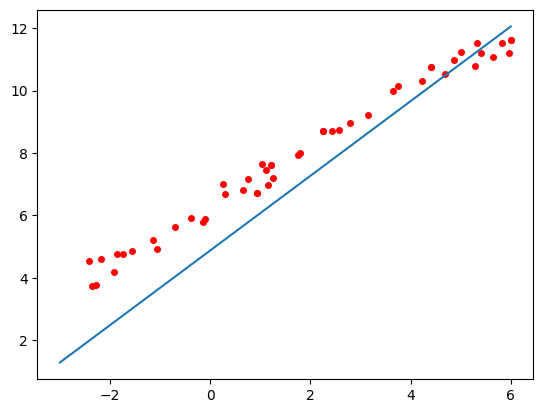

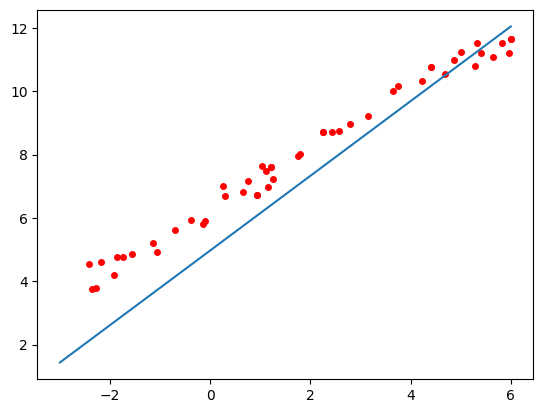

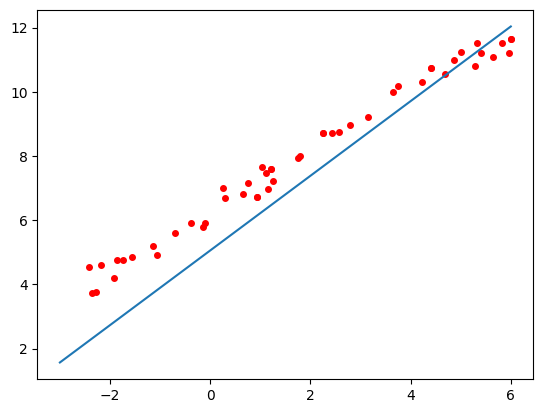

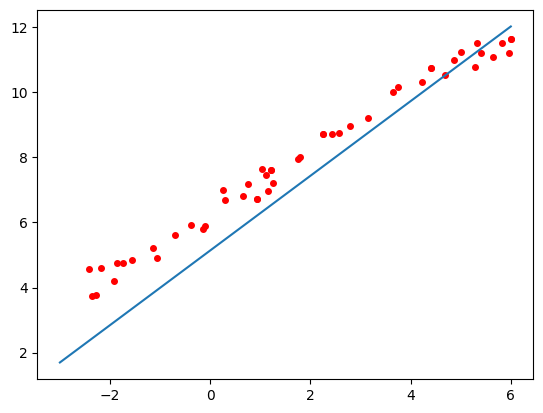

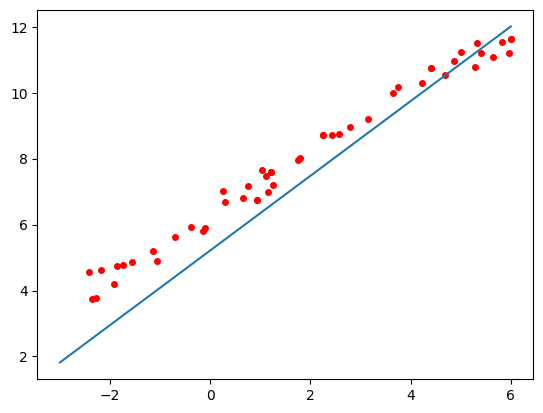

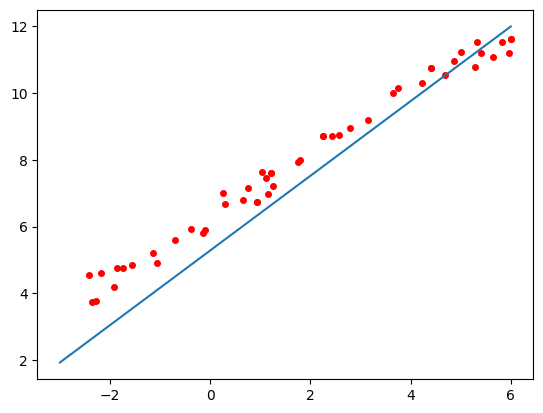

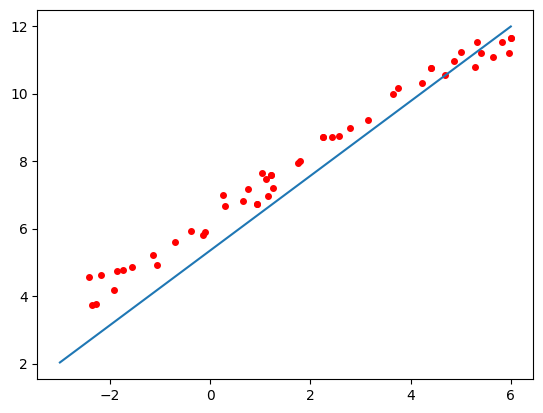

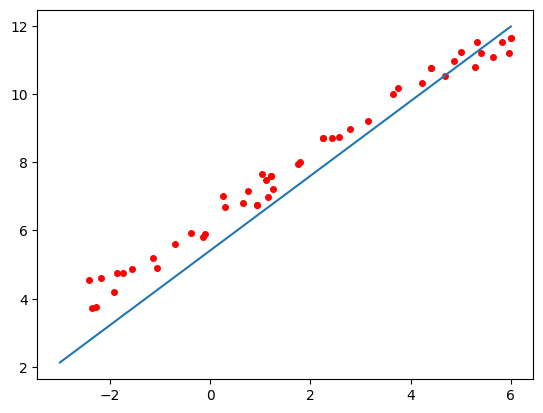

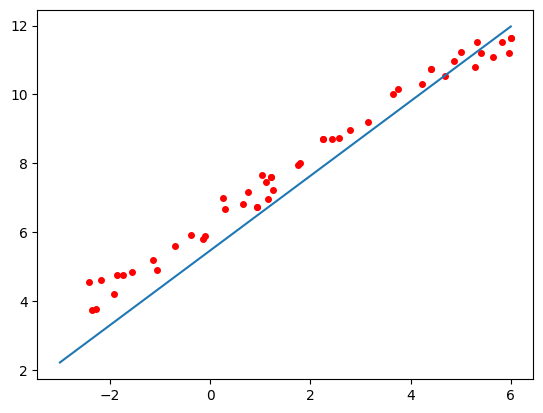

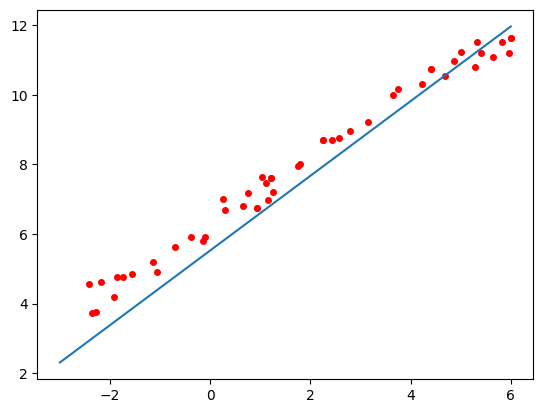

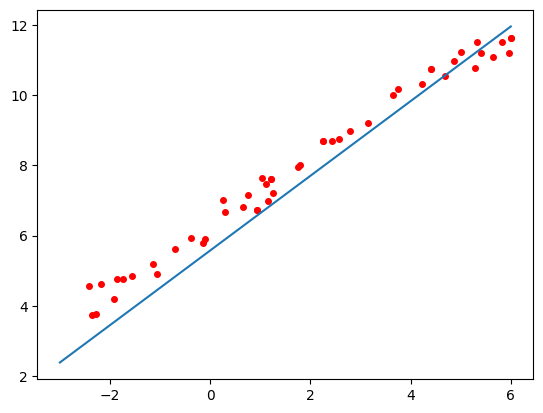

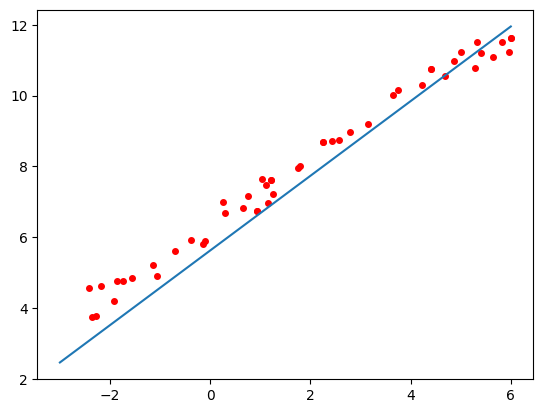

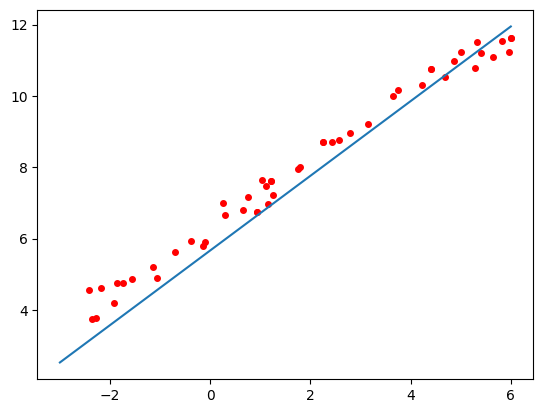

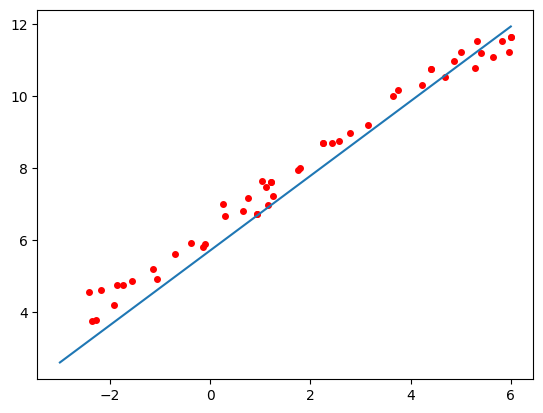

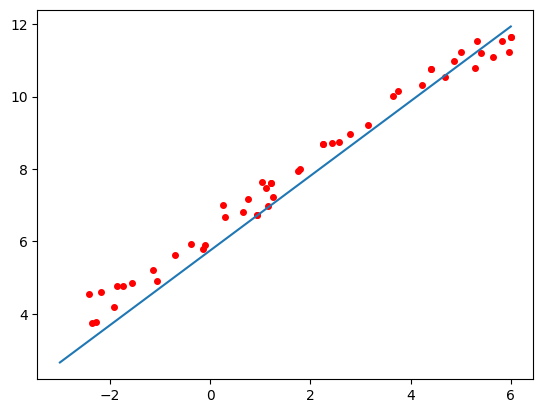

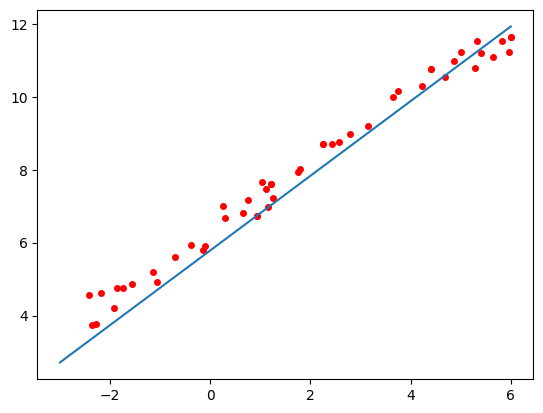

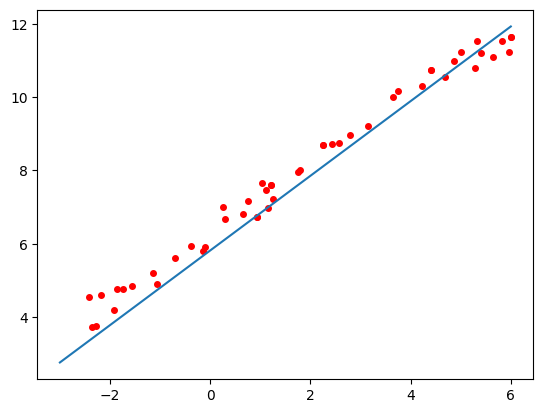

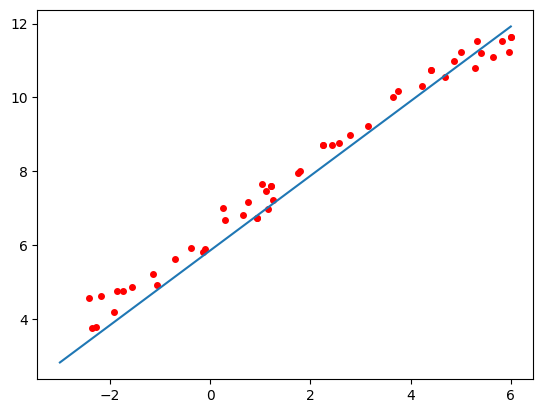

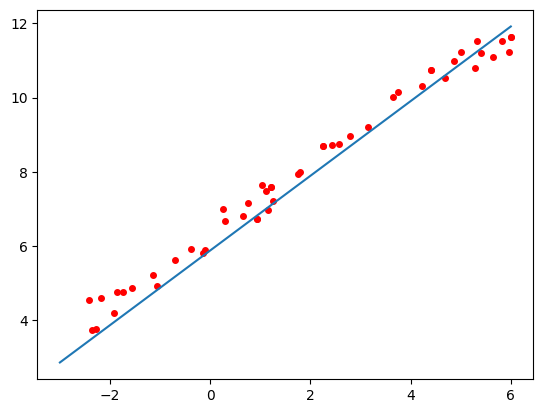

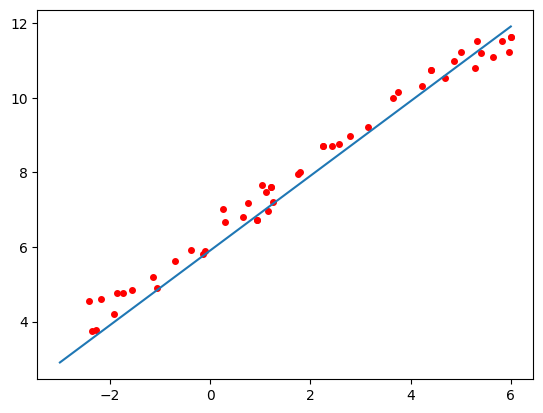

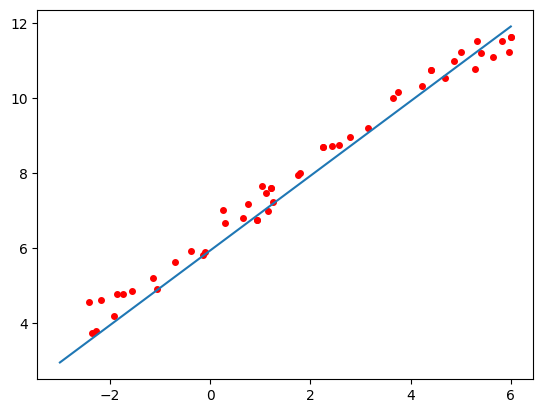

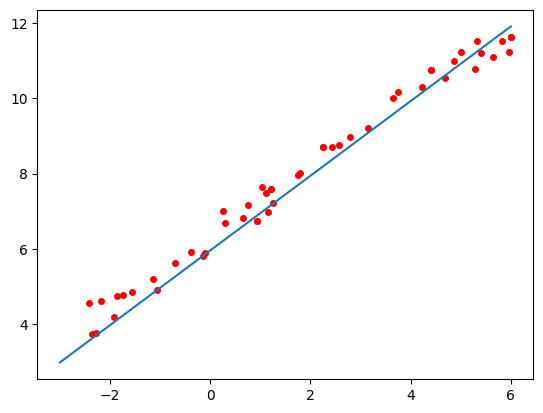

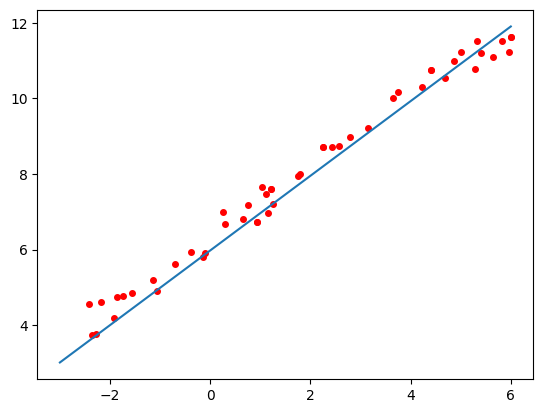

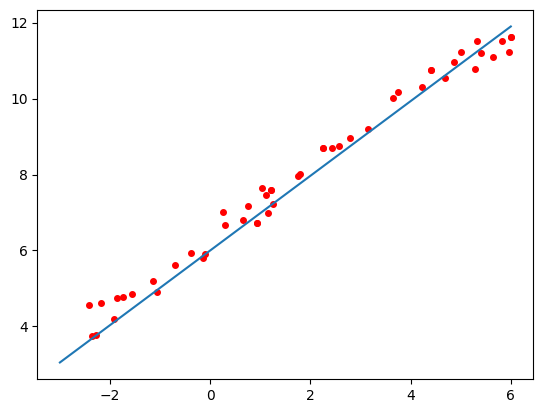

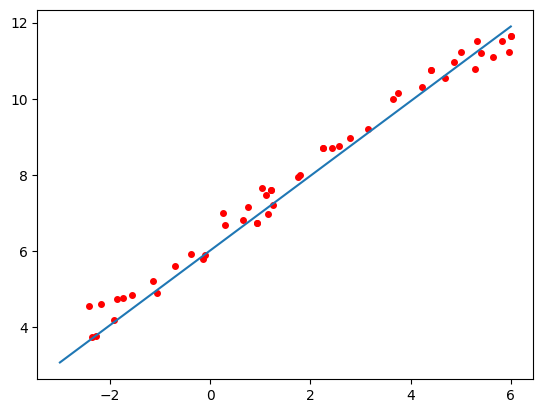

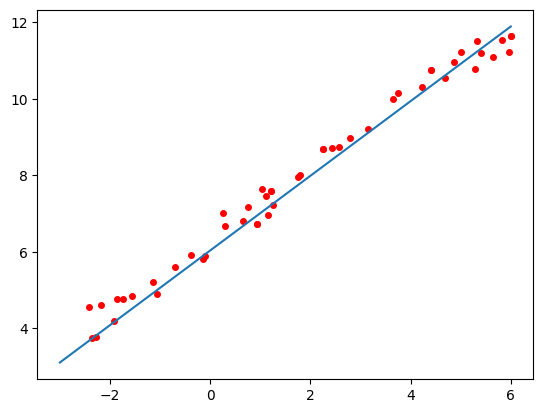

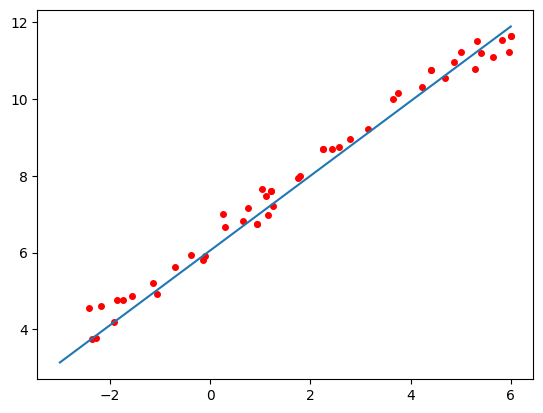

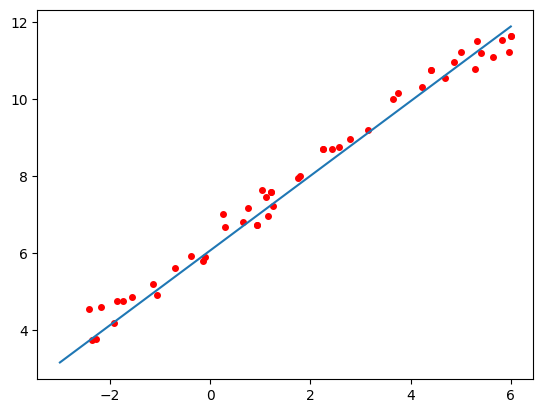

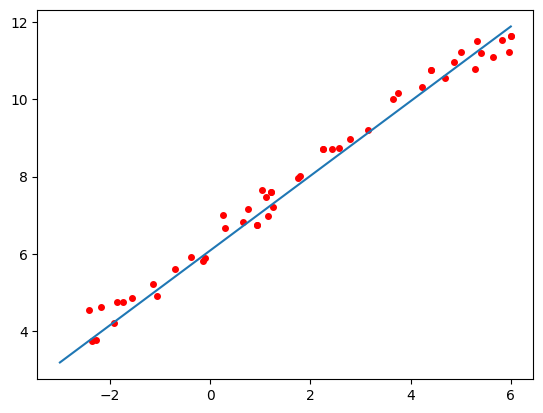

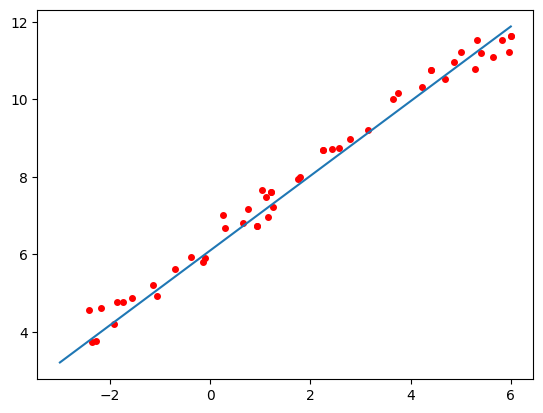

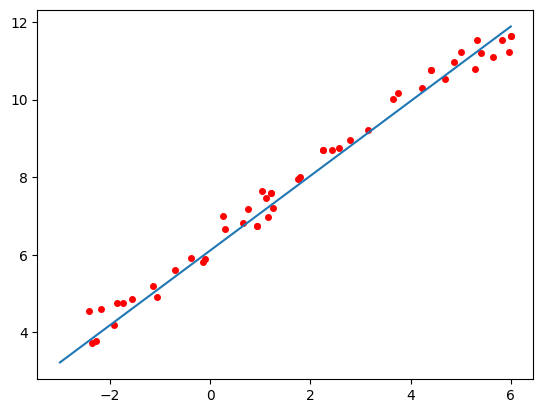

array([[6.11193357],
       [0.9619202 ]])

In [8]:
#Establecer tasa de aprendizaje y pesos iniciales
alfa = 0.1
w = np.random.random_sample((X1.shape[1],1))
w_n = 3*w

i = 0
fig = plt.figure(figsize=(4, 3))

while (np.abs(np.linalg.norm(w_n-w)) > 1e-1) or (i < 50):
#while i < 1000:
    w_n = w.copy()
    
    w = w - 1/nd*alfa*X1.T@(X1@w-y)
    # for j in range(2)
        # w[j] = w[j] - 1/nd*alfa*np.matmul((np.matmul(X1,w)-y).T,X1[:,j])
    i+=1
    plt.plot(X,y,'or',markersize=4)
    plt.plot(t,np.matmul(G,w))
    plt.show()
    fig.canvas.draw()
        
w

In [9]:
alfa = 0.1
w = np.random.random_sample((X1.shape[1],1))
w_n = 3*w

i = 0
fig, ax = plt.subplots()
line1, = ax.plot(X,y,'or',markersize=4)
line2, = ax.plot([],[])
plt.close(fig)
R = []

while np.abs(np.linalg.norm(w_n-w)) > 1e-5:
    w_n = w.copy()
    w = w - 1/nd*alfa*X1.T@(X1@w-y)
    R.append(w_n)

def anim(i):
    w = R[i]
    line2.set_data(t,np.matmul(G,w))
    return (line2,)

RL_GD = animation.FuncAnimation(fig, func=anim, frames=len(R), interval=200, blit=True)
HTML(RL_GD.to_jshtml())

## Ahora con Scikit-learn 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
print(X.shape)
X = X.reshape(-1, 1)
print(X.shape)

(50,)
(50, 1)


In [12]:
#Pasos básicos SKlearn
clf = LinearRegression() #Se crea el clasificador
clf.fit(X,y)

LinearRegression()

In [13]:
print(clf.intercept_,clf.coef_)

[6.29722881] [[0.92668995]]


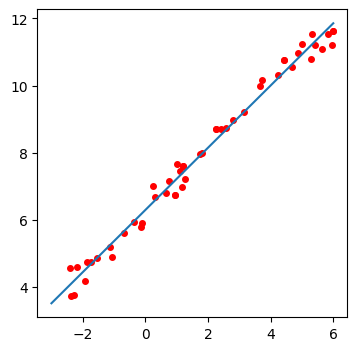

In [14]:
wn = np.array([clf.intercept_,clf.coef_[0]])

G = np.stack((np.ones(200),t),axis = 1)
fig = plt.figure(figsize=(4.0, 4.0))
ax = fig.add_subplot(111)
ax.plot(X,y,'or',markersize=4)
ax.plot(t,np.dot(G,wn))
plt.show()

In [15]:
#Estimar valores Nuevos con la recta hallada

xp = np.array([[0.2]])
yp = clf.predict(xp)
ax.plot(xp,yp,'^g', markersize=7)
plt.show()
print(f'para un valor de x de {xp[0,0]} el valor estimado de y (f(x)) es {yp[0,0]}')

para un valor de x de 0.2 el valor estimado de y (f(x)) es 6.482566798779915


## Regresión Polinomial

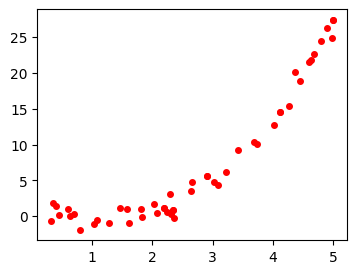

In [16]:
#Crear función polinomial con ruido y seleccionar puntos aleatorios

D2 = lambda x: 2*x**2 - 5*x + 0.2
t2 = np.linspace(0,5,200)
TT2 = D2(t2) + 4 * np.random.rand(200)

fig = plt.figure(figsize=(4.0, 3.0))
# plt.plot(t2,TT2)

per2 = np.random.randint(0,200,200)
nd2 = 50
X2 = t2[per[:nd]]
y2 = TT2[per[:nd]]
y2 = np.expand_dims(y2,axis=1)


plt.plot(X2,y2,'or',markersize=4)

#Ecuación normal

o = np.ones(nd)
X12 = np.stack((o,X2,X2**2),axis = 1)

w = np.linalg.inv(X12.T@X12)@X12.T@y2
w
plt.show()

[[-7.83382616]
 [ 5.69882281]]


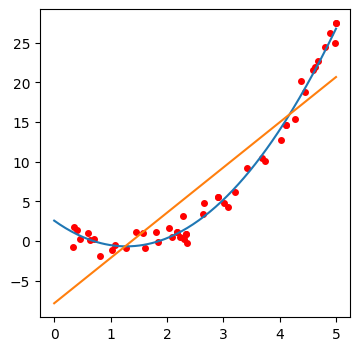

In [17]:
fig = plt.figure(figsize=(4, 4))
plt.plot(X2,y2,'or',markersize=4)

G2 = np.stack((np.ones(200),t2,t2**2),axis = 1)
plt.plot(t2,np.matmul(G2,w))

G2L = np.stack((np.ones(200),t2),axis = 1)

X1L = np.stack((o,X2),axis = 1)
wL = np.linalg.inv(X1L.T@X1L)@X1L.T@y2 #np.matmul, np.dot
print(wL)
plt.plot(t2,np.matmul(G2L,wL))

plt.show()

(500, 200)


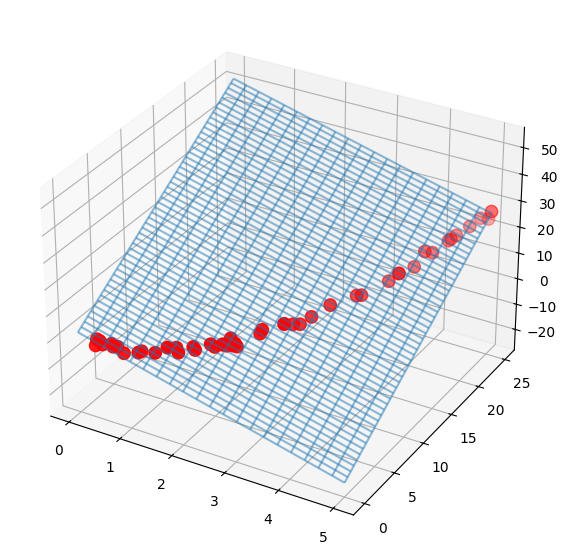

In [18]:
#Mostrar 3 dimensiones nuevas

fig = plt.figure(figsize=(7, 7.0))
ax = fig.add_subplot(111, projection='3d')

tt = np.linspace(0.0,25.0,500);
[XX, YY] = np.meshgrid(t2,tt);
Xe = XX.flatten()
Ye = YY.flatten()

XY = np.stack((np.ones(len(Xe)),Xe,Ye),axis = 1)
WW = XY@w;
print(XX.shape)
P1 = np.reshape(WW,XX.shape)
#P2 = np.zeros(XX.shape)
#for i in range(XX.shape[0]):
#    for j in range(XX.shape[1]):
#        P2[i,j] = [1,XX[i,j],YY[i,j]]@w
#        
#print(P2)


ax.scatter(X12[:,1],X12[:,2],y2,color='r',s=80)
ax.plot_wireframe(XX,YY,P1,rstride=10,cstride=10,alpha=0.5)
plt.show()